<a href="https://colab.research.google.com/github/SONUXO/machine-learning/blob/main/Mymodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers

In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')


In [3]:
data= [train_set, test_set]

for dataset in data:
    dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Age']=dataset['Age'].astype(int)

In [4]:
gender ={'male':0, 'female':1}
data= [train_set,test_set]

for dataset in data:
      dataset['Sex']=dataset['Sex'].map(gender)
      dataset['Sex']=dataset['Sex'].astype(int)

In [5]:
port ={'S':0,'C':1,'Q':2}
data =[train_set, test_set]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    
for dataset in data:
    dataset['Embarked']= dataset['Embarked'].map(port)
    dataset['Embarked']=dataset['Embarked'].astype(int)

In [ ]:
train_set.head(1000)

In [7]:
test_set_id= test_set['PassengerId']
test_set_name=test_set['Name']

train_set=train_set.drop(['PassengerId'],axis=1)
train_set= train_set.drop(['Cabin'],axis=1)
train_set= train_set.drop(['Name'],axis=1)
train_set=train_set.drop(['Ticket'],axis=1)
    
test_set=test_set.drop(['PassengerId'],axis=1)
test_set= test_set.drop(['Cabin'],axis=1)
test_set= test_set.drop(['Name'],axis=1)
test_set=test_set.drop(['Ticket'],axis=1)


In [ ]:
train_set.head()

In [72]:
def create_model():
      model =tf.keras.models.Sequential()
      model.add(tf.keras.layers.Dense(units=12,input_shape=(7,), activation='relu'),)
      model.add(tf.keras.layers.Dense(units=8,activation='relu'))
      model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
      model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
      return model


In [10]:
def train_model(model,features,label,epochs,batch_size):
      history= model.fit(x=features,y=label,epochs=epochs,batch_size=batch_size)
      epoch=history.epoch

      hist= pd.DataFrame(history.history)
      return epoch,hist

In [11]:
def plot_function(epoch, hist, matrices):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in matrices:
          x=hist[m]
          plt.plot(epoch[1:],x[1:],label=m)

    
    plt.legend()

In [12]:
y_train=train_set['Survived']
train_set=train_set.drop(['Survived'],axis=1)

In [13]:
data=[train_set, test_set]

for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)


In [ ]:
train_set.info()

Epoch 1/250
60/60 [==============================] - 1s 2ms/step - loss: 3.2186 - accuracy: 0.4119
Epoch 2/250
60/60 [==============================] - 0s 2ms/step - loss: 0.8004 - accuracy: 0.6375
Epoch 3/250
60/60 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.6162
Epoch 4/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6352
Epoch 5/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6397
Epoch 6/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6644
Epoch 7/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6790
Epoch 8/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6880
Epoch 9/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.6790
Epoch 10/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.6981
Epoch 11/

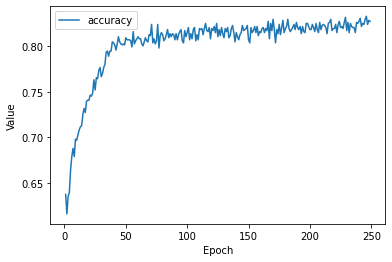

In [75]:
epochs=250
batch_size=15

my_model= create_model()

epochs, hist= train_model(my_model,train_set,y_train,epochs,batch_size)

list_of_metrices=['accuracy']

plot_function(epochs,hist, list_of_metrices)

In [29]:
predictions=(my_model.predict(test_set) > 0.5).astype(int)

In [ ]:
for i in range(test_set_id.count()):
    print(test_set_id[i],"     ",test_set_name[i],"      ",predictions[i])